# 関数などの準備

In [1]:
import matplotlib.pyplot as plt

In [2]:
def plot_train_val_loss(history):
    """エポックごとの損失の可視化"""
    train_loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    epochs = range(1, len(train_loss) + 1)

    plt.plot(epochs, train_loss, "bo", label="Training loss")
    plt.plot(epochs, val_loss, "r", label="Validation loss")

    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.show()

In [3]:
def plot_train_val_acc(history):
    """エポックごとのAccuracyの可視化"""
    train_acc = history.history["acc"]
    val_acc = history.history["val_acc"]

    epochs = range(1, len(train_acc) + 1)

    plt.plot(epochs, train_acc, "bo", label="Training acc")
    plt.plot(epochs, val_acc, "r", label="Validation acc")

    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.ylim(0, 1.0)
    plt.legend()

    plt.show()

# データの準備

In [4]:
from keras.datasets import mnist

(X_trainval, y_trainval), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, random_state=0)

In [6]:
X_train.shape, X_val.shape, X_test.shape

((45000, 28, 28), (15000, 28, 28), (10000, 28, 28))

In [7]:
# 学習曲線を分かりやすくするために学習データを減らしている
X_train = X_train[:1000]
y_train = y_train[:1000]

X_train.shape, y_train.shape

((1000, 28, 28), (1000,))

## どんなデータかを確認する

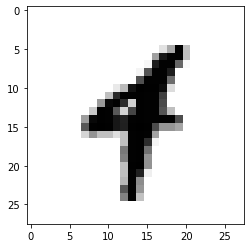

In [8]:
digit = X_train[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

## データの前処理

In [9]:
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_train = X_train.astype("float32") / 255

X_val = X_val.reshape((X_val.shape[0], 28 * 28))
X_val = X_val.astype("float32") / 255

X_test = X_test.reshape((X_test.shape[0], 28 * 28))
X_test = X_test.astype("float32") / 255

In [10]:
X_train.shape, X_val.shape, X_test.shape

((1000, 784), (15000, 784), (10000, 784))

In [11]:
y_train.shape, y_val.shape, y_test.shape

((1000,), (15000,), (10000,))

In [12]:
y_train[:10]

array([3, 1, 4, 4, 4, 6, 2, 1, 1, 6], dtype=uint8)

In [13]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [14]:
y_train.shape, y_val.shape, y_test.shape

((1000, 10), (15000, 10), (10000, 10))

# モデルの構築

In [15]:
from keras import layers, models
from keras.losses import categorical_crossentropy
from keras.optimizers import RMSprop

model = models.Sequential()

# 層を1つ追加(隠れ層その1): 16次元 全結合  活性化関数はReLU 784次元の入力を受け取る
model.add(layers.Dense(16, activation="relu", input_shape=(784,)))

# 層を1つ追加(隠れ層その2): 32次元 全結合  活性化関数はReLU 入力の次元はkerasが勝手に判断
model.add(layers.Dense(32, activation="relu"))

# 層を1つ追加(出力層(=最終層)): 10次元 全結合 活性化関数はSoftmax 入力の次元はkerasが勝手に判断
model.add(layers.Dense(10, activation="softmax"))

W0709 19:17:40.271258 140735674078080 deprecation_wrapper.py:119] From /Users/mohira/src/github.com/mohira/ml-materials/.venv/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0709 19:17:40.297168 140735674078080 deprecation_wrapper.py:119] From /Users/mohira/src/github.com/mohira/ml-materials/.venv/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0709 19:17:40.302586 140735674078080 deprecation_wrapper.py:119] From /Users/mohira/src/github.com/mohira/ml-materials/.venv/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                12560     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 13,434
Trainable params: 13,434
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer=RMSprop(lr=0.001),  # 最適化アルゴリズム: RMSProp / 学習率: 0.001
              loss=categorical_crossentropy,  # 損失関数: カテゴリカル交差エントロピー
              metrics=["accuracy"])         # 評価指標: 正答率

W0709 19:17:40.470241 140735674078080 deprecation_wrapper.py:119] From /Users/mohira/src/github.com/mohira/ml-materials/.venv/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0709 19:17:40.477462 140735674078080 deprecation_wrapper.py:119] From /Users/mohira/src/github.com/mohira/ml-materials/.venv/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



# モデルの訓練

In [18]:
history = model.fit(X_train,
                    y_train,
                    epochs=10,
                    validation_data=(X_val, y_val),
                    verbose=1)

W0709 19:17:40.639369 140735674078080 deprecation.py:323] From /Users/mohira/src/github.com/mohira/ml-materials/.venv/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0709 19:17:40.718617 140735674078080 deprecation_wrapper.py:119] From /Users/mohira/src/github.com/mohira/ml-materials/.venv/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 1000 samples, validate on 15000 samples
Epoch 1/10
1000/1000 [==============================] - 0s 458us/step - loss: 2.0084 - acc: 0.3610 - val_loss: 1.7616 - val_acc: 0.4809
Epoch 2/10
1000/1000 [==============================] - 0s 189us/step - loss: 1.4891 - acc: 0.6050 - val_loss: 1.3354 - val_acc: 0.6554
Epoch 3/10
1000/1000 [==============================] - 0s 190us/step - loss: 1.1019 - acc: 0.7250 - val_loss: 1.0436 - val_acc: 0.7197
Epoch 4/10
1000/1000 [==============================] - 0s 196us/step - loss: 0.8393 - acc: 0.7940 - val_loss: 0.8802 - val_acc: 0.7525
Epoch 5/10
1000/1000 [==============================] - 0s 190us/step - loss: 0.6785 - acc: 0.8390 - val_loss: 0.7429 - val_acc: 0.7907
Epoch 6/10
1000/1000 [==============================] - 0s 186us/step - loss: 0.5689 - acc: 0.8530 - val_loss: 0.6476 - val_acc: 0.8193
Epoch 7/10
1000/1000 [==============================] - 0s 190us/step - loss: 0.4902 - acc: 0.8810 - val_loss: 0.6007 - val_acc: 0.8246

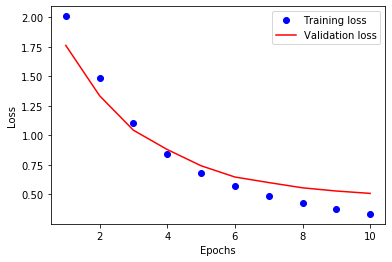

In [19]:
# 可視化
plot_train_val_loss(history)

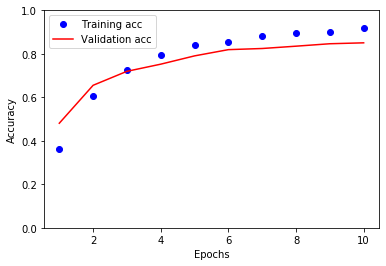

In [20]:
plot_train_val_acc(history)

# 演習
- いろいろと変更してみよう
    - 層の設計(層の数とノード数)
    - 活性化関数
    - 最適化アルゴリズム
    - エポック数

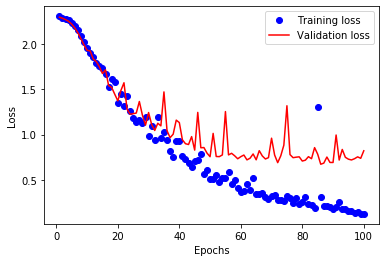

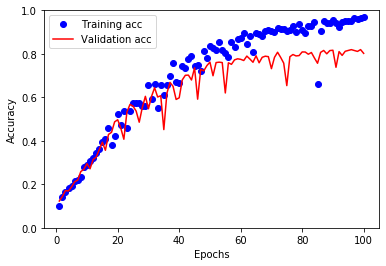

In [21]:
from keras import layers, models
from keras.losses import categorical_crossentropy
from keras.optimizers import SGD, RMSprop

model2 = models.Sequential()

model2.add(layers.Dense(16, activation="sigmoid", input_shape=(784,)))
model2.add(layers.Dense(16, activation="relu"))
model2.add(layers.Dense(32, activation="relu"))
model2.add(layers.Dense(16, activation="relu"))
model2.add(layers.Dense(10, activation="softmax"))

model2.compile(optimizer=SGD(lr=0.1),
               loss=categorical_crossentropy,
               metrics=["accuracy"])

history2 = model2.fit(X_train,
                      y_train,
                      epochs=100,
                      validation_data=(X_val, y_val),
                      batch_size=100,
                      verbose=0)

# 可視化
plot_train_val_loss(history2)
plot_train_val_acc(history2)